In [1]:
from keras import layers
from keras import models


#이미지 하나씩이라고 생각한다는 전제하야
#하나의 이미지를 150*150으로 넣고, rgb니까 3으로 넣어야겠지
#그리고 convolutional layer를 거치면 필터링을 하게돼 -> 32개의 서로 다른 이미지들이 생성돼(컬러를 흑백으로 바꾸는 등)
#그 다음 필터링에서도 말 그대로 우리가 인스타에서 하는 필터링을 해 이러한 64개의 서로 다른 이미지들을 만들지
#결국 제일 저차원의 피처를 추출하게 되는거야


model = models.Sequential() #CNN layer 생성
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', #3*3 convolutional layer 사용 / 활성화 함수는 relu, input 이미지의 형태:가로150,세로150,RGB값(3)
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #64*3*3을 1차원으로 만듦
model.add(layers.Dropout(0.5)) #
model.add(layers.Dense(512, activation = 'relu')) #
model.add(layers.Dense(1, activation = 'sigmoid')) #sigmoid (2진법에 사용됨)

#model.summary()

In [2]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', #2진법에 사용됨
             optimizer = optimizers.SGD(learning_rate=1e-4),
             metrics=['acc'])

# 데이터 전처리

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                r'C:\Users\Seo\Desktop\AI-PARKINGLOT - copy', #트레이닝 이미지 불러오기
                target_size = (150, 150), #인풋 이미지 킈기가 150*150이므로 사이즈를 동일하게 설정
                batch_size = 32, #5000개의 트레이닝 이미지를 20번에 나눠서 줌 -> 배치 한번에 250개의 이미지가 들어감
                class_mode = 'binary') #binary = 이진법

validation_generator = test_datagen.flow_from_directory(
                r'C:\Users\Seo\Desktop\png\test', #validaiton 이미지 불러오기
                target_size = (150, 150),
                batch_size = 32, #1000개의 테스트 이미지를 20번에 나눠서 줌 -> 배치 1번에 50개의 이미지 들어감
                class_mode = 'binary')

Found 8670 images belonging to 2 classes.
Found 9042 images belonging to 2 classes.


In [4]:
samples_per_epoch = 100 #epoch 한 번 돌릴때마다 100개의 이미지를 봄

history = model.fit_generator(
        train_generator,
        steps_per_epoch=samples_per_epoch,
        epochs = 50, #훈련 50번 시키기
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/50


C:\Users\Seo\AppData\Local\Temp\ipykernel_13424\2033847891.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 84s 833ms/step - loss: 0.6948 - acc: 0.5109 - val_loss: 0.7073 - val_acc: 0.1125
Epoch 2/50
100/100 [==============================] - 85s 848ms/step - loss: 0.6948 - acc: 0.4938 - val_loss: 0.7067 - val_acc: 0.1138
Epoch 3/50
100/100 [==============================] - 84s 840ms/step - loss: 0.6947 - acc: 0.5088 - val_loss: 0.7063 - val_acc: 0.1094
Epoch 4/50
100/100 [==============================] - 88s 877ms/step - loss: 0.6944 - acc: 0.5128 - val_loss: 0.7053 - val_acc: 0.1231
Epoch 5/50
100/100 [==============================] - ETA: 0s - loss: 0.6943 - acc: 0.5194

KeyboardInterrupt: 

In [ ]:
model.save('All_1.h5') #모델 저장

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 데이터 증식 사용하기

In [1]:
from keras.preprocessing.image import ImageDataGenerator
#2버전은 아래 내용 다 바꿈
datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.5,
        height_shift_range = 0.5,
        shear_range = 0.4,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [2]:
from tensorflow.keras.preprocessing import image
import os, shutil
import matplotlib.pyplot as plt

#fnames = sorted([os.path.join(r'C:\Users\Seo\Desktop\vehicles_and_non-vechiles\train\vehicles', fname) for
#        fname in os.listdir(r'C:\Users\Seo\Desktop\vehicles_and_non-vechiles\train\vehicles')])
    
img_path = r'C:\Users\Seo\Desktop\AI-PARKINGLOT - copy' #fnames[3] # 증식할 이미지 선택

img = image.load_img(img_path, target_size=(150, 150)) #이미지 읽고 크기 변경

x = image.img_to_array(img) #(150, 150, 3) 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape) #(1,150,150,3) 크기로 변환
i = 0

#랜덤하게 변환된 이미지 배치 생성
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break;
plt.show()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Seo\\Desktop\\AI-PARKINGLOT - copy'

In [5]:
#버전 3은 con2D 3,4번째 64 -> 128로 수정
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #overfitting을 막기 위해 사용
model.add(layers.Dense(512, activation = 'relu')) #히든 레이어
model.add(layers.Dense(1, activation = 'sigmoid')) #아웃풋
#padding = 'valid', stride = 1 ->default

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate = 1e-4), #optimizer = 학습속도를 빠르고 안정되게 함
             metrics = ['acc'])

In [6]:
# train_datagen = ImageDataGenerator(
#     rescale = 1./255,
#     rotation_range=20,
#     width_shift_range = 0.1,
#     height_shift_range = 0.1,
#     shear_range = 0.1,
#     zoom_range = 0.1,
#     horizontal_flip = True,)

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\Seo\Desktop\AI-PARKINGLOT - copy',
        target_size=(150,150),
        batch_size = 32,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\Seo\Desktop\project_source\png\test',
        target_size=(150,150),
        batch_size = 32,
        class_mode = 'binary')

Found 9473 images belonging to 2 classes.
Found 9042 images belonging to 2 classes.


In [7]:
samples_per_epoch = 100

history = model.fit_generator(
        train_generator,
        steps_per_epoch=samples_per_epoch,
        epochs = 200,
        validation_data = validation_generator,
        validation_steps = 50)

C:\Users\Seo\AppData\Local\Temp\ipykernel_1556\1897907687.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/200
100/100 [==============================] - 124s 1s/step - loss: 0.4299 - acc: 0.8475 - val_loss: 0.4257 - val_acc: 0.8906
Epoch 2/200
100/100 [==============================] - 132s 1s/step - loss: 0.3428 - acc: 0.8596 - val_loss: 0.3814 - val_acc: 0.9094
Epoch 3/200
100/100 [==============================] - 136s 1s/step - loss: 0.2696 - acc: 0.8809 - val_loss: 0.6706 - val_acc: 0.8637
Epoch 4/200
100/100 [==============================] - 131s 1s/step - loss: 0.2378 - acc: 0.9041 - val_loss: 0.7114 - val_acc: 0.8213
Epoch 5/200
100/100 [==============================] - 122s 1s/step - loss: 0.2106 - acc: 0.9120 - val_loss: 0.8973 - val_acc: 0.8481
Epoch 6/200
100/100 [==============================] - 116s 1s/step - loss: 0.1957 - acc: 0.9206 - val_loss: 0.8298 - val_acc: 0.8750
Epoch 7/200
100/100 [==============================] - 107s 1s/step - loss: 0.1761 - acc: 0.9272 - val_loss: 0.8888 - val_acc: 0.8106
Epoch 8/200
100/100 [==============================] - 105s 1s

Epoch 121/200
100/100 [==============================] - 99s 988ms/step - loss: 0.0135 - acc: 0.9937 - val_loss: 2.8745 - val_acc: 0.8037
Epoch 122/200
100/100 [==============================] - 97s 976ms/step - loss: 0.0175 - acc: 0.9943 - val_loss: 3.6546 - val_acc: 0.7600
Epoch 123/200
100/100 [==============================] - 102s 1s/step - loss: 0.0152 - acc: 0.9950 - val_loss: 3.1851 - val_acc: 0.7669
Epoch 124/200
100/100 [==============================] - 101s 1s/step - loss: 0.0128 - acc: 0.9953 - val_loss: 3.0797 - val_acc: 0.7669
Epoch 125/200
100/100 [==============================] - 99s 995ms/step - loss: 0.0214 - acc: 0.9928 - val_loss: 3.0179 - val_acc: 0.5913
Epoch 126/200
100/100 [==============================] - 99s 993ms/step - loss: 0.0178 - acc: 0.9937 - val_loss: 2.8293 - val_acc: 0.7862
Epoch 127/200
100/100 [==============================] - 99s 994ms/step - loss: 0.0105 - acc: 0.9965 - val_loss: 2.9831 - val_acc: 0.8156
Epoch 128/200
100/100 [===============

In [8]:
model.save('AI_only_18.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape=(150, 150, 3))

#conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\Seo\Desktop\png\train',
        target_size=(150,150),
        batch_size = 20,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\Seo\Desktop\png\test',
        target_size=(150,150),
        batch_size = 20,
        class_mode = 'binary')

Found 38152 images belonging to 2 classes.
Found 9042 images belonging to 2 classes.


In [15]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])

In [16]:
#나중에는 epochs 30으로 돌리기

samples_per_epoch = 100

history = model.fit_generator(
        train_generator,
        steps_per_epoch=samples_per_epoch,
        epochs = 20,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/20


C:\Users\Seo\AppData\Local\Temp\ipykernel_13588\2677506925.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 64s 629ms/step - loss: 0.0169 - acc: 0.9945 - val_loss: 0.5872 - val_acc: 0.9000
Epoch 2/20
100/100 [==============================] - 62s 624ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 0.8811 - val_acc: 0.8760
Epoch 3/20
100/100 [==============================] - 61s 606ms/step - loss: 0.0132 - acc: 0.9955 - val_loss: 0.7859 - val_acc: 0.8950
Epoch 4/20
100/100 [==============================] - 60s 604ms/step - loss: 0.0102 - acc: 0.9970 - val_loss: 0.7230 - val_acc: 0.8850
Epoch 5/20
100/100 [==============================] - 61s 608ms/step - loss: 0.0149 - acc: 0.9970 - val_loss: 0.7791 - val_acc: 0.8970
Epoch 6/20
100/100 [==============================] - 61s 614ms/step - loss: 0.0112 - acc: 0.9975 - val_loss: 0.7156 - val_acc: 0.8930
Epoch 7/20
100/100 [==============================] - 63s 627ms/step - loss: 0.0131 - acc: 0.9950 - val_loss: 0.5475 - val_acc: 0.8980
Epoch 8/20
100/100 [==============================] - 64s 639ms/st

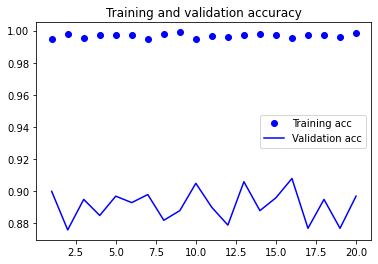

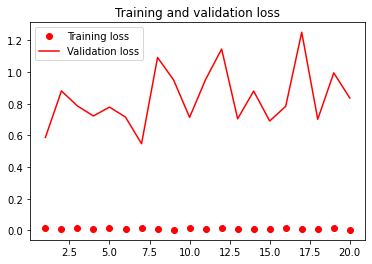

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
model.save('vehicles_and_non-vehicles.h5')

NameError: name 'x_test' is not defined

In [18]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

NameError: name 'conv_base' is not defined

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate = 1e-5),
             metrics = ['acc'])

In [ ]:
#나중에는 epochs 30으로 돌리기

samples_per_epoch = 100

history = model.fit_generator(
        train_generator,
        steps_per_epoch=samples_per_epoch,
        epochs = 20,
        validation_data = validation_generator,
        validation_steps = 50)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
        smooth_curve(acc), 'bo', label ='Smoothed training acc')
plt.plot(epochs,
        smooth_curve(val_acc), 'b', label = 'Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
        smooth_curve(loss), 'ro', label ='Smoothed training loss')
plt.plot(epochs,
        smooth_curve(val_loss), 'r', label = 'Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('new_final_1.h5')